In [116]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt  
weather = pd.read_csv('lifeweather.csv')

In [117]:
fmt = "%Y%m%d"
weather['DATE2'] = pd.to_datetime(weather['DATE'],format=fmt)
weather['DAY'] = (pd.DatetimeIndex(weather['DATE2']).dayofyear + 101)
weather['DAY'] = (weather['DAY']%365)
weather.index = pd.to_datetime(weather['DATE2'])


In [118]:
start = datetime.datetime(2006, 6, 3)
end = datetime.datetime(2016, 10, 31)

chiweather = weather.ix[start:end]
weather = weather.ix[:start]


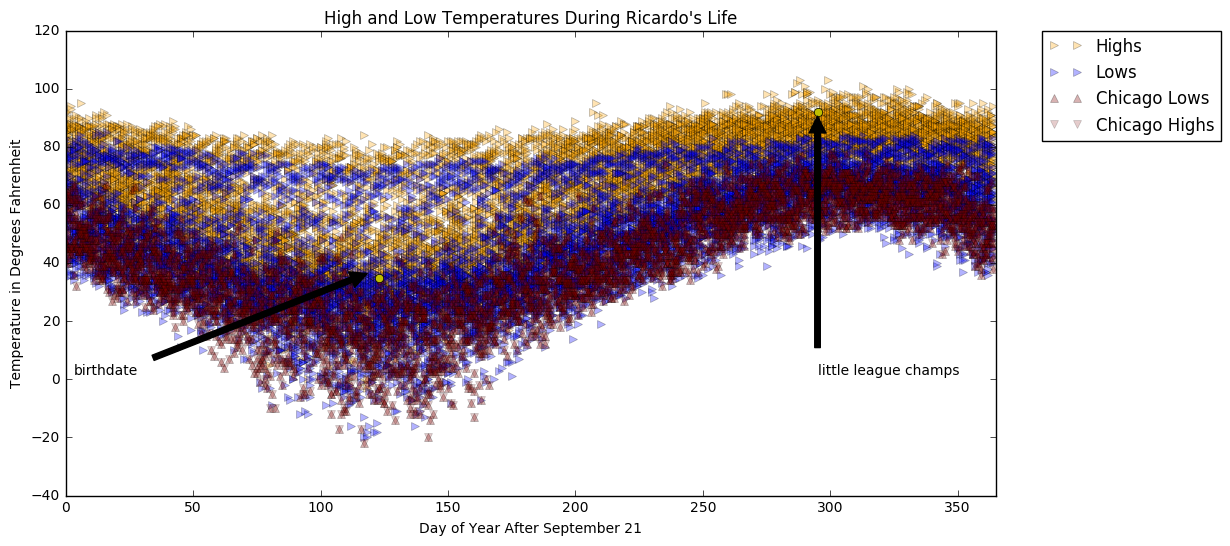

In [148]:
from matplotlib import colors as mcolors
import numpy as np

fig = plt.figure(figsize=(12,6))
plt.plot(weather['DAY'], weather['TMAX'], '>', alpha=0.3, color='orange', label="Highs", linewidth=0.01)
plt.plot(weather['DAY'], weather['TMIN'], '>', alpha=0.3, color='b', label="Lows", linewidth=0.01)
plt.plot(chiweather['DAY'], chiweather['TMIN'], '^', alpha=0.3, color='maroon', label="Chicago Lows", linewidth=0.01)
plt.plot(chiweather['DAY'], chiweather['TMIN'], 'v', alpha=0.2, color='maroon', label="Chicago Highs", linewidth=0.01)
plt.axis([0,365,-40,120])
plt.title("High and Low Temperatures During Ricardo's Life")
plt.xlabel("Day of Year After September 21")
plt.ylabel("Temperature in Degrees Fahrenheit")

x1 = np.array([123])
y1 = np.array(weather.ix[datetime.datetime(1975,1,22)]['TMAX'])
plt.plot(x1,y1,'o', alpha=1,color='y')

x2 = np.array([295])
y2 = np.array(weather.ix[datetime.datetime(1988,7,14)]['TMAX'])
plt.plot(x2,y2,'o', alpha=1,color='y')

plt.annotate('birthdate', xy=(x1, y1+3), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate('little league champs', xy=(x2, y2+3), xytext=(x2, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()